<a href="https://colab.research.google.com/github/claredavies/MedicalImaging/blob/main/MedicalImagingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install neeeded packages (After running **RESTART RUNTIME**)

In [1]:
!pip install pydicom
!pip install pylibjpeg
!pip install gdcm
!pip install pydicom[pylibjpeg]
!pip install python-gdcm
!pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg
!pip install pydicom pylibjpeg pylibjpeg-libjpeg
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 35.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 74.0 MB/s eta 0:00:00
Looking i

# Loading need libraries

In [1]:
import os

import matplotlib
import pydicom
import numpy as np
import scipy
from matplotlib import pyplot as plt, animation
import zipfile
import cv2
from scipy.optimize import minimize

# Tutorial

In [2]:
def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, :, img_dcm.shape[1]//2]    # Why //2?


def median_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, img_dcm.shape[2]//2, :]


def MIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the sagittal orientation. """
    return np.max(img_dcm, axis=2)


def AIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the sagittal orientation. """
    return np.mean(img_dcm, axis=2)


def MIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the coronal orientation. """
    return np.max(img_dcm, axis=1)


def AIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the coronal orientation. """
    return np.mean(img_dcm, axis=1)


def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """ Rotate the image on the axial plane. """
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

How do you know the pixel_len_mm???

In [3]:
dcm = pydicom.dcmread('1-1.dcm')     # Load DICOM file
print(dcm)                          # Print DICOM headers
pixel_len_mm = [3.27, 0.98, 0.98]   # Pixel length in mm [z, y, x]
img_dcm = dcm.pixel_array           # Get pixel array
img_dcm = np.flip(img_dcm, axis=0)  # Change orientation (better visualization)

FileNotFoundError: ignored

In [ ]:
# Show median planes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Sagittal')
ax[1].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[2])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()

In [ ]:
# Show MIP/AIP/Median planes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()

In [ ]:
# Create projections varying the angle of rotation
#   Configure visualization colormap
img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = matplotlib.colormaps['bone']
fig, ax = plt.subplots()
#   Configure directory to save results
os.makedirs('results/MIP/', exist_ok=True)
#   Create projections
n = 6
projections = []
for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    rotated_img = rotate_on_axial_plane(img_dcm, alpha)
    projection = MIP_sagittal_plane(rotated_img)
    plt.imshow(projection, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])
    plt.savefig(f'results/MIP/Projection_{idx}.png')      # Save animation
    projections.append(projection)  # Save for later animation
# Save and visualize animation
animation_data = [
    [plt.imshow(img, animated=True, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data,
                          interval=250, blit=True)
anim.save('results/MIP/Animation.gif')  # Save animation
plt.show() 

In [ ]:
from IPython.display import Image

# Provide the path to the GIF file
gif_path = 'results/MIP/Animation.gif'

# Display the GIF
Image(filename=gif_path)

# Making sense of headers

In [2]:
def get_header_value(dicom_file, header_name):
    try:
        header_value = dicom_file[header_name].value
    except KeyError:
        header_value = None
    return header_value

In [3]:
def search_for_header_in_dcm(word_to_search, dcm):
  # Define the word to search for in the header names
  # Search for headers containing the specified word
  matching_headers = []
  for element in dcm:
      if word_to_search.lower() in element.name.lower():
          return True
          matching_headers.append(element.name)

  return False

In [4]:
def is_single_acquisition_slice(dicom_file):
    if 'AcquisitionNumber' in dicom_file:
        acquisition_number = dicom_file.AcquisitionNumber
        if isinstance(acquisition_number, str):
            acquisition_number = int(acquisition_number)
            
        # Check if the AcquisitionNumber is 1, indicating a single acquisition slice
        if acquisition_number == 1:
            return True
          
    return False

In [5]:
def check_index_presence(image_files, segmentation_files):
    list_headers_to_find = ['Slice Index', 'Acquisition Number', 'Per-frame Functional Groups Sequence', 
                            'Image Position Patient', "Segment Identification Sequence", "Referenced Segment Number"]

    found_terms = []
    for dicom_file in image_files + segmentation_files:
        for term in list_headers_to_find:
          res = search_for_header_in_dcm(term, dicom_file)
          if res is True:
            list_headers_to_find.remove(term)
            found_terms.append(term)


    return found_terms

In [6]:
!ls

drive-download-20230522T170643Z-001.zip
file
HCC_004.zip
icbm_avg_152_t1_tal_nlin_symmetric_VI.dcm
output
sample_data


In [7]:
def load_dicom_files_from_zip(zip_filename, extract_folder):
  # Extract DICOM files from the zip archive
  zip_file_path = zip_filename  

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

  return load_dicom_files_from_folder(extract_folder)

In [8]:
import zipfile

def unzip_file(zip_path, target_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_folder)

In [9]:
def load_dicom_files_from_folder(folder_path):
  image_files = []
  segmentation_files = []
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          if file.endswith('.dcm'):
              dicom_file = pydicom.dcmread(os.path.join(root, file))
              if is_single_acquisition_slice(dicom_file):
                  image_files.append(dicom_file)
              else:
                  segmentation_files.append(dicom_file)

  return image_files, segmentation_files

In [10]:
[image_files, segmentation_files] = load_dicom_files_from_zip('HCC_004.zip','file')

In [11]:
def rearrange_pixel_arrays_from_zip(image_files, file_folder):
      [image_files, segmentation_files] = load_dicom_files_from_zip(image_files, file_folder)
      return rearrange_pixel_arrays(image_files, segmentation_files)

In [12]:
def rearrange_pixel_arrays_from_folder(folder_path):
      [image_files, segmentation_files] = load_dicom_files_from_folder(folder_path)
      return rearrange_pixel_arrays(image_files, segmentation_files)

In [13]:
def rearrange_pixel_arrays(image_files, segmentation_files):
    image_headers = [dicom_file.get('AcquisitionNumber', None) for dicom_file in image_files]
    image_position_headers = [dicom_file.get('PerFrameFunctionalGroupsSequence', [{}])[0].get('ImagePositionPatient', None) for dicom_file in image_files]

    # Sort the DICOM files based on the headers
    sorted_image_files = [dicom_file for _, dicom_file in sorted(zip(image_headers, image_files), key=lambda x: x[0])]
    sorted_image_position_headers = [header for _, header in sorted(zip(image_headers, image_position_headers), key=lambda x: x[0])]

    # Create new lists to store the sorted DICOM files and corresponding pixel arrays
    sorted_images = []
    sorted_segmentations = []

    # Iterate through the sorted DICOM files and extract the pixel arrays
    for image_file, image_position_header in zip(sorted_image_files, sorted_image_position_headers):
        image_array = image_file.pixel_array

        # Perform further processing or analysis with the sorted image array

        sorted_images.append(image_array)

    for segmentation_file in segmentation_files:
        segmentation_array = segmentation_file.pixel_array

        # Perform further processing or analysis with the segmentation array

        sorted_segmentations.append(segmentation_array)

    return sorted_images, sorted_segmentations

In [14]:
[sorted_images, sorted_segmentations] = rearrange_pixel_arrays_from_zip('HCC_004.zip','file')

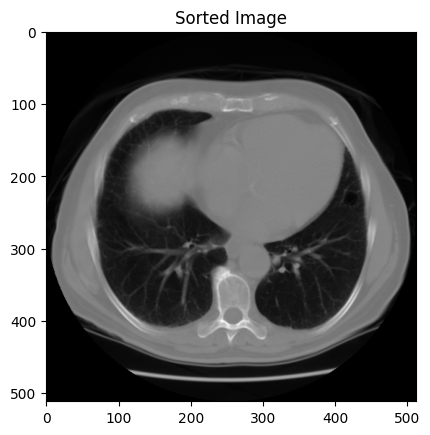

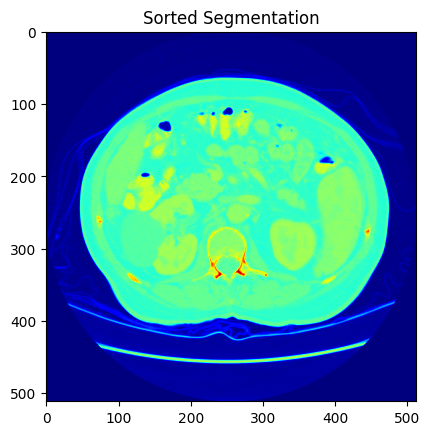

In [15]:
import matplotlib.pyplot as plt

# Display one of the sorted images
plt.imshow(sorted_images[0], cmap='gray')
plt.title('Sorted Image')
plt.show()

# Display one of the sorted segmentations
plt.imshow(sorted_segmentations[0], cmap='jet')
plt.title('Sorted Segmentation')
plt.show()


# Manually select landmarks

In [ ]:
unzip_file('drive-download-20230522T170643Z-001.zip', 'output')

In [67]:
def resize_to_same(input_images, ref_images):
  desired_size = (256, 256)  # Adjust as per your requirements

  # Resize the reference images
  resized_ref_images = []
  for ref_image in ref_images:
      resized_image = cv2.resize(ref_image, desired_size)
      resized_ref_images.append(resized_image)

  # Resize the input images
  resized_input_images = []
  for input_image in input_images:
      resized_image = cv2.resize(input_image, desired_size)
      resized_input_images.append(resized_image)

  return resized_input_images, resized_ref_images

In [107]:
from PIL import Image
def calculate_average_image(images):
    image_arrays = []
    for img in images:
        img_array = np.array(img)
        image_arrays.append(img_array)

    # Calculate the average image
    average_img_array = np.mean(image_arrays, axis=0)

    # Convert the average image array back to a PIL image
    average_img = Image.fromarray(np.uint8(average_img_array))

    return average_img

In [191]:
[_, input_dcm] = load_dicom_files_from_folder('output/RM_Brain_3D-SPGR')
_, input_images = rearrange_pixel_arrays(_, input_dcm)

reference_dcm = pydicom.dcmread('icbm_avg_152_t1_tal_nlin_symmetric_VI.dcm')
ref_images = reference_dcm.pixel_array
input_images, ref_images = resize_to_same(input_images, ref_images)

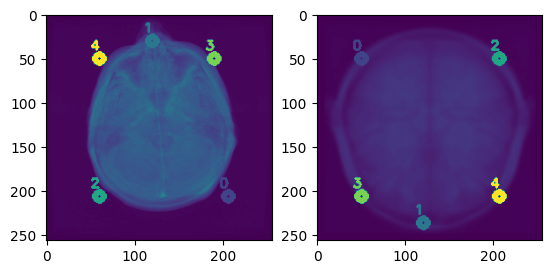

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming debug_img1 and debug_img2 are already defined
avg_input = calculate_average_image(input_images)
avg_ref = calculate_average_image(ref_images)

debug_img1 = np.array(avg_input.copy())
debug_img2 = np.array(avg_ref.copy())

srcPts = [(206, 206), (120, 30), (60, 206), (190, 50), (60, 50)]
dstPts = [(50, 50), (120, 236), (206, 50), (50, 206), (206, 206)]

circle_radius = 5  # Adjust the radius value to control the circle size
for i, (srcPt, dstPt) in enumerate(zip(srcPts, dstPts)):
    shade = int(255 * (i + 1) / len(srcPts))  # Calculate the shade value based on the index

    # Draw circle on debug_img1
    cv2.circle(debug_img1, (int(srcPt[0]), int(srcPt[1])), circle_radius, (shade, shade, shade), 5)
    # Add label to the circle
    cv2.putText(debug_img1, str(i), (int(srcPt[0]) - 10, int(srcPt[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (shade, shade, shade), 2)

    # Draw circle on debug_img2
    cv2.circle(debug_img2, (int(dstPt[0]), int(dstPt[1])), circle_radius, (shade, shade, shade), 5)
    # Add label to the circle
    cv2.putText(debug_img2, str(i), (int(dstPt[0]) - 10, int(dstPt[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (shade, shade, shade), 2)

plt.subplot(1, 2, 1)
plt.imshow(debug_img1)

plt.subplot(1, 2, 2)
plt.imshow(debug_img2)

plt.show()

# Co-register

In [271]:
def calculate_transform(kp1, kp2):
    """Helper to apply find the best affine transform using two arrays of landmarks.
    it returns the affine transform, a matrix T of size (2, 3)

    Typical use:
        T = calculate_transform(lmk2, lmk1)

    kp1, kp2: landmarks of target and source images respectively as np.ndarray
    """
    kp1 = np.array(kp1)
    kp2 = np.array(kp2)
    upper = np.concatenate((kp1, np.ones((kp1.shape[0], 1)), np.zeros((kp1.shape[0], 3))), axis=1)
    lower = np.concatenate((np.zeros((kp1.shape[0], 3)), kp1, np.ones((kp1.shape[0], 1))), axis=1)
    X = np.concatenate((upper, lower), axis=0)
    Y = np.concatenate((kp2[:, 0], kp2[:, 1]))
    Y = np.expand_dims(Y, axis=-1)
    T = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    T = T.reshape(2, 3)
    T = np.concatenate((T, np.array([0, 0, 1]).reshape(1, 3)), axis=0)
    kp2_pred = np.dot(T, np.concatenate((kp1, np.ones((kp1.shape[0], 1))), axis=1).T).T
    kp2_pred /= kp2_pred[:, -1:]
    error = np.linalg.norm(kp2_pred[:, :2] - kp2)
    print("coordinate reconstruction error: ", error)
    return T

In [276]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin

def coregister(input_image, reference_image, input_landmarks, reference_landmarks):
    avg_input_arr = np.array(avg_input.copy())
    avg_ref_arr = np.array(avg_ref.copy())

    height, width = np.array(avg_input_arr).shape
    mat = calculate_transform(srcPts, dstPts)
    transformed_img = cv2.warpPerspective(avg_input_arr,
                        mat, (width, height))

    return transformed_img

coordinate reconstruction error:  15.391650015898874


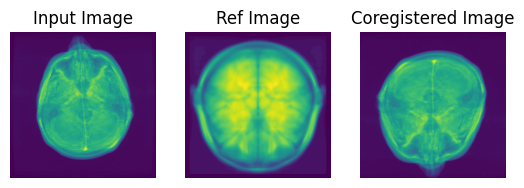

In [278]:
avg_input = calculate_average_image(input_images)
avg_ref = calculate_average_image(ref_images)

transformed_img = coregister(avg_input, avg_ref, srcPts, dstPts)

plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.axis('off')
plt.imshow(avg_input)

plt.subplot(1, 3, 2)
plt.title('Ref Image')
plt.axis('off')
plt.imshow(avg_ref)

plt.subplot(1, 3, 3)
plt.title('Coregistered Image')
plt.axis('off')
plt.imshow(transformed_img)

# Co-register images

# Landmarks Threshold

# Data Exploration

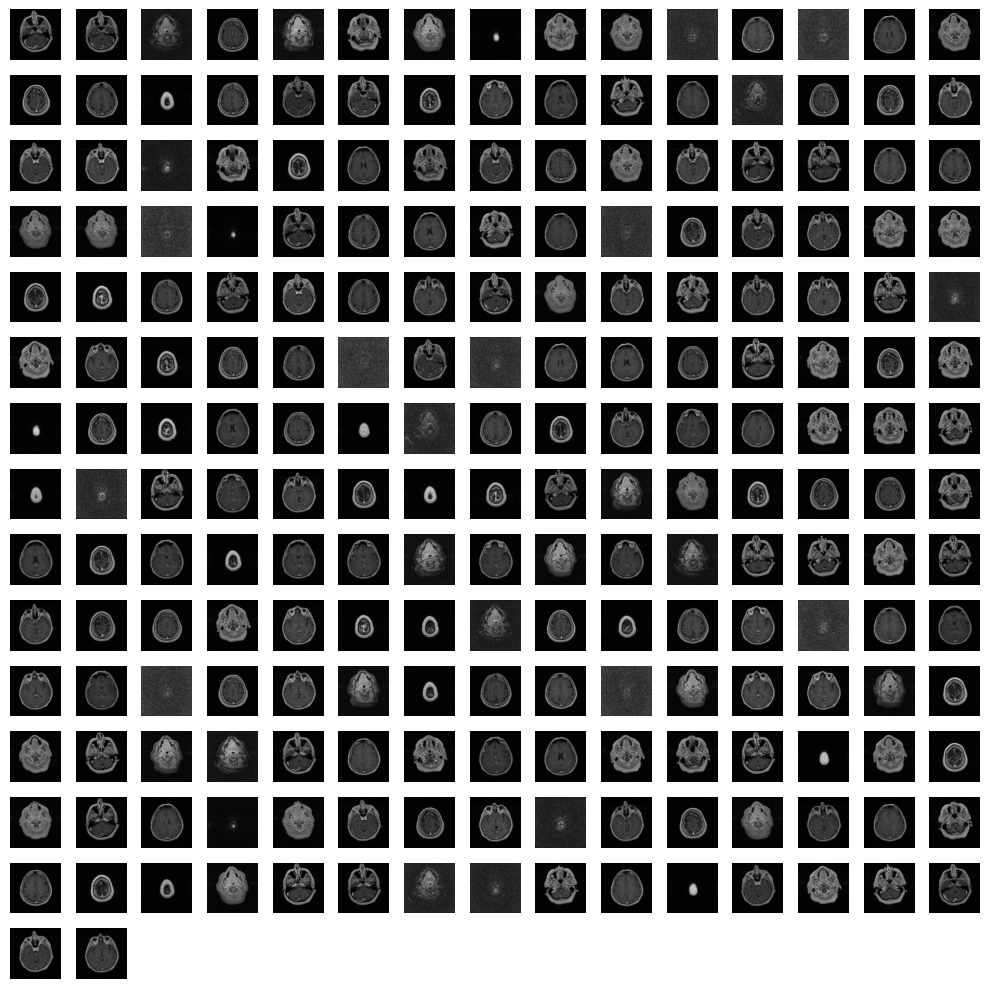

In [ ]:
import matplotlib.pyplot as plt
import math

# Define the size of the grid
grid_size = math.ceil(math.sqrt(len(input_images)))  # Adjust the grid size as needed

# Create a subplot grid
fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Iterate over the input images and plot them in the grid
for i, image in enumerate(input_images[:grid_size * grid_size]):
    # Calculate the position in the grid
    row = i // grid_size
    col = i % grid_size

    # Plot the image in the corresponding grid cell
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].axis('off')

# Hide empty subplots if any
for i in range(len(input_images), grid_size * grid_size):
    row = i // grid_size
    col = i % grid_size
    axs[row, col].axis('off')

# Adjust the spacing and layout of subplots
plt.tight_layout()

# Display the grid of small image windows
plt.show()

# Detect Thamalas Region

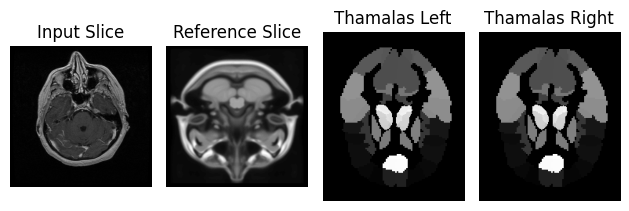

In [ ]:
[_, input_dcm] = load_dicom_files_from_folder('output/RM_Brain_3D-SPGR')
_, input_images = rearrange_pixel_arrays(_, input_dcm)

reference_dcm = pydicom.dcmread('icbm_avg_152_t1_tal_nlin_symmetric_VI.dcm')
ref_images = reference_dcm.pixel_array
# input_image =input_dcm[100].pixel_array

input_images, ref_images = resize_to_same(input_images, ref_images)
coregistered_images = coregistration(input_images, ref_images)

thamalus_dcm = pydicom.dcmread('AAL3_1mm.dcm')
thamalus_slice_data = thamalus_dcm.pixel_array

# Select a specific slice from the pixel data
ref_slice_index = 100  # Adjust this value to the desired slice index
ref_slice_data = reference_dcm.pixel_array[ref_slice_index]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 4)

# Display the input slice in the first subplot
axs[0].imshow(input_images[20], cmap=plt.cm.gray)
axs[0].axis('off')  # Hide the axis ticks
axs[0].set_title('Input Slice')

# Display the reference slice in the second subplot
axs[1].imshow(ref_images[20], cmap=plt.cm.gray)
axs[1].axis('off')  # Hide the axis ticks
axs[1].set_title('Reference Slice')

# Display the reference slice in the second subplot
axs[2].imshow(thamalus_slice_data[81], cmap=plt.cm.gray)
axs[2].axis('off')  # Hide the axis ticks
axs[2].set_title('Thamalas Left')

# Display the reference slice in the second subplot
axs[3].imshow(thamalus_slice_data[82], cmap=plt.cm.gray)
axs[3].axis('off')  # Hide the axis ticks
axs[3].set_title('Thamalas Right')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [ ]:
def threshold_thamalas(im):
  lower_threshold = 100  # Lower threshold value
  upper_threshold = 255  # Upper threshold value

  # Threshold the image
  _, thresholded_image = cv2.threshold(im, lower_threshold, upper_threshold, cv2.THRESH_BINARY)

  return thresholded_image

In [ ]:
def get_image_highlight_thamalas(input_images, ref_images):
  coregistered_image = coregistration(input_images, ref_images)
  coregistered_image_thamalas = threshold_thamalas(coregistered_image)

  # Create a blank 3-channel image with the same dimensions as the grayscale image
  overlay = cv2.cvtColor(ref_images[100], cv2.COLOR_GRAY2BGR)

  # Set the Thalamus region pixels in the overlay image to red
  overlay[coregistered_image_thamalas > 0] = (0, 255, 0)  # BGR value for red

  return overlay

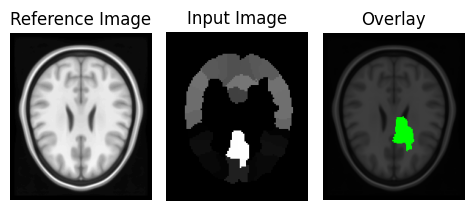

In [ ]:
input_images = input_dcm.pixel_array
ref_images = reference_dcm.pixel_array[0:181]

thamalas_im = get_image_highlight_thamalas(input_images, ref_images)

# Display the reference image
plt.subplot(1, 4, 1)
plt.imshow(ref_images[100], cmap='gray')
plt.title('Reference Image')
plt.axis('off')

# Overlay input image onto reference image
plt.subplot(1, 4, 2)
plt.imshow(input_images[100], cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Overlay input image onto reference image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(thamalas_im, cv2.COLOR_BGR2RGB))
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()